14. Determine unique facilities that are very rare in orders of prevalence. Infer what may cause
these facilities to be in place on their current locations. Are there possible other stations that
could benefit from these facilities?

In [1]:
import pandas as pd
from pathlib import Path
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import src.utils as utils
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
import src.data_processing.data as data
from shapely.geometry import Point

In [2]:
data.facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_open_wednesday,sales_close_wednesday,sales_open_thursday,sales_close_thursday,sales_open_friday,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday
2,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00
3,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
4,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0 days 07:00:00,0 days 14:15:00,0 days 07:00:00,0 days 14:15:00,0 days 07:00:00,0 days 14:15:00,0 days 07:45:00,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00
5,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 07:00:00,0 days 14:15:00
6,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
669,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
670,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 07:15:00,0 days 14:30:00,0 days 07:15:00,0 days 14:30:00
672,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00


In [3]:
number_facilities = pd.DataFrame(data.facilities[data.facil_col].sum(axis = 0), index = data.facil_col, columns = ["Number of Facilities"])
number_facilities['Facility X'] = number_facilities.index


In [4]:
number_facilities = number_facilities.sort_values(by = "Number of Facilities", ascending=False)

In [5]:
number_facilities

,Number of Facilities,Facility X
ticket_vending_machine,484.0,ticket_vending_machine
free_parking,390.0,free_parking
bus,302.0,bus
disabled_parking_spots,212.0,disabled_parking_spots
bicycle_spots,193.0,bicycle_spots
elevated_platform,157.0,elevated_platform
audio_induction_loop,137.0,audio_induction_loop
ramp,114.0,ramp
blue-bike,49.0,blue-bike
taxi,44.0,taxi


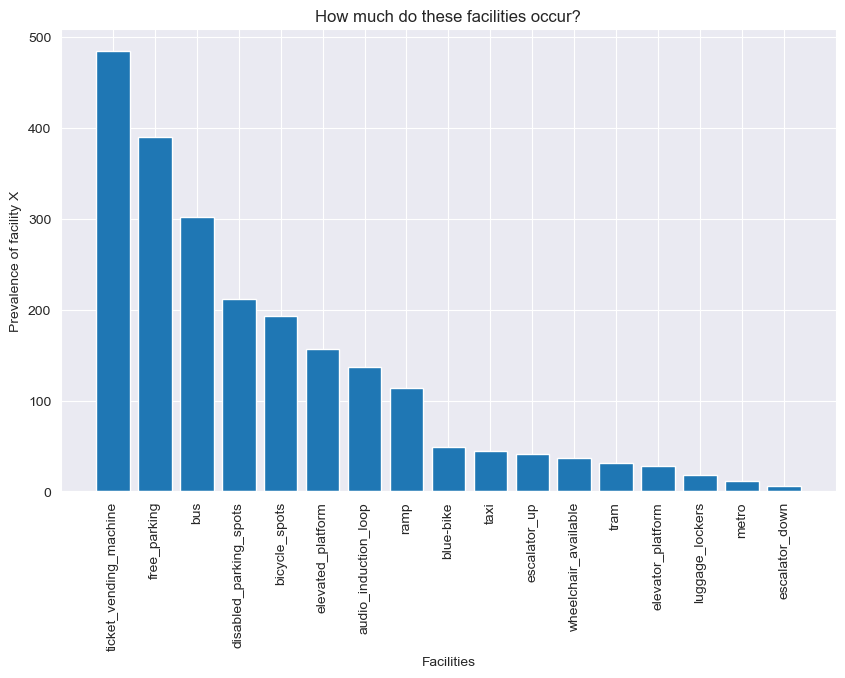

In [6]:
plt.figure(figsize=(10,6), facecolor= "white")
plt.bar(number_facilities['Facility X'], number_facilities['Number of Facilities'])
plt.xlabel("Facilities")
plt.ylabel("Prevalence of facility X")
plt.title("How much do these facilities occur?")
plt.xticks(rotation = "vertical")
plt.show()

In [7]:
#ASSUMPTION: rare facilities are facilities where the amount drops, starting from blue-bike until escalator down
rare_facilities = number_facilities.tail(9)
rare_facilities

,Number of Facilities,Facility X
blue-bike,49.0,blue-bike
taxi,44.0,taxi
escalator_up,41.0,escalator_up
wheelchair_available,37.0,wheelchair_available
tram,31.0,tram
elevator_platform,28.0,elevator_platform
luggage_lockers,18.0,luggage_lockers
metro,11.0,metro
escalator_down,6.0,escalator_down


In [16]:
rare_facilities['Facility X']

blue-bike                          blue-bike
taxi                                    taxi
escalator_up                    escalator_up
wheelchair_available    wheelchair_available
tram                                    tram
elevator_platform          elevator_platform
luggage_lockers              luggage_lockers
metro                                  metro
escalator_down                escalator_down
Name: Facility X, dtype: object

In [8]:
stations_rare_facilities = []
for a in rare_facilities['Facility X']:
        stations_rare_facilities.append(data.facilities[data.facilities[a] == 1]['URI'])

stations_rare_facilities



[2      008895000
 4      008891140
 5      008833209
 25     008821006
 38     008812070
 64     008891124
 109    008891009
 111    008813003
 114    008811304
 115    008812005
 118    008814001
 160    008892106
 164    008893401
 168    008831401
 186    008893708
 241    008832433
 244    008831765
 246    008893120
 247    008892007
 250    008895505
 269    008814308
 280    008831005
 287    008821832
 293    008821717
 317    008896503
 342    008896008
 367    008833001
 374    008821600
 386    008841004
 390    008894201
 392    008822111
 426    008822004
 427    008822343
 445    008832409
 448    008881000
 456    008821238
 466    008863008
 481    008895760
 490    008891702
 493    008811601
 496    008892601
 531    008896800
 572    008894508
 573    008831807
 602    008831310
 603    008891314
 611    008821907
 626    008811189
 636    008896149
 Name: URI, dtype: object,
 2      008895000
 17     008863404
 24     008821121
 25     008821006
 36     008866001
 

<AxesSubplot:>

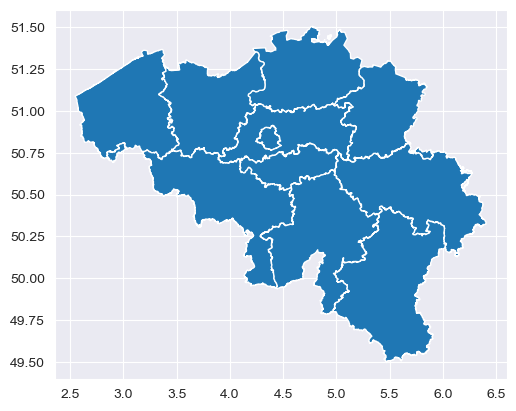

In [9]:
## Now we want to map all these stations with rare facilities on the geospatial map:
provinces = data.provinces
stations = data.stations
provinces.plot()

In [13]:
stations_rare_df = stations[(stations['URI'].isin(stations_rare_facilities[0])) | (stations['URI'].isin(stations_rare_facilities[1])) | (stations['URI'].isin(stations_rare_facilities[2])) | (stations['URI'].isin(stations_rare_facilities[3])) | (stations['URI'].isin(stations_rare_facilities[4])) | (stations['URI'].isin(stations_rare_facilities[5])) | (stations['URI'].isin(stations_rare_facilities[6])) | (stations['URI'].isin(stations_rare_facilities[7])) | (stations['URI'].isin(stations_rare_facilities[8])) ]
stations_rare_df

,URI,name,country-code,longitude,latitude,avg_stop_times,official_transfer_time
3,008895000,Aalst,be,4.039653,50.942813,157.425373,300.0
5,008891140,Aalter,be,3.447848,51.092295,188.276119,240.0
6,008833209,Aarschot,be,4.824043,50.984406,171.664179,240.0
18,008863404,Andenne,be,5.094699,50.496759,88.313433,300.0
25,008821121,Antwerpen-Berchem,be,4.432221,51.199230,645.343284,300.0
...,...,...,...,...,...,...,...
633,008814118,Vorst-Oost/Forest-Est,be,4.320943,50.810195,123.947761,300.0
634,008814373,Vorst-Zuid/Forest-Midi,be,4.309167,50.809215,218.895522,300.0
637,008896149,Waregem,be,3.425510,50.892456,109.805970,300.0
663,008891553,Zeebrugge-Dorp,be,3.195170,51.326383,17.671642,300.0


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

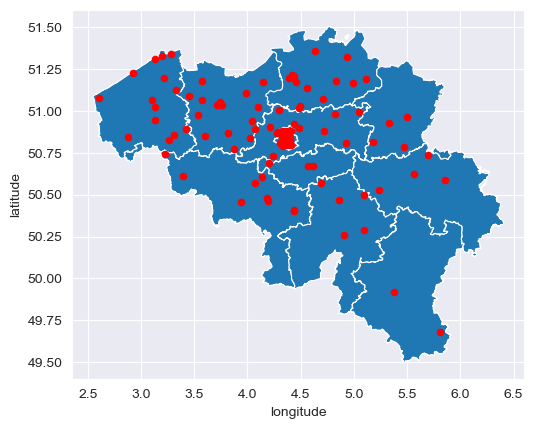

In [11]:
#make the stations with rare facilities visible on the map
ax = stations_rare_df.plot('longitude', 'latitude', 'scatter',  color='red', zorder =10)
provinces.plot(linewidth = 0.8, ax = ax)

In [ ]:
## what may cause these facilities to be here? --> we notice that in wallonia there are a lot less of these stations, because these stations are less visited, so more facilities are less needed. The stations that have rare facilities are stations that are visited a lot, popular destinations


EXTRA INSIGHTS:
in terms of other stations that could benefit from this, i would only look at the stations with metro facilities: using the metro you can get to other stations that are close to these stations with metro facilities. These stations would then benefit from the rare facilities of the nearby stations.

In [45]:
#We will now plot these stations, and the nearby stations with zero facilities who could benefit from it
stations_metro_tram = stations[(stations['URI'].isin(stations_rare_facilities[4])) | (stations['URI'].isin(stations_rare_facilities[7]))]
stations_nofacilities = data.facilities[data.facilities[data.facil_col].sum(axis = 1) ==0]
stations_nofacilities
stations_none = stations[stations['URI'].isin(stations_nofacilities['URI'])]
stations_none

,URI,name,country-code,longitude,latitude,avg_stop_times,official_transfer_time
57,008895463,Bambrugge,be,3.935711,50.913769,7.731343,300.0
62,008865128,Bastogne-Nord,be,5.720744,50.006919,16.723881,300.0
63,008865110,Bastogne-Sud,be,5.709858,49.999737,16.723881,300.0
69,008871183,Beignée,be,4.406305,50.333893,33.514925,300.0
89,008841434,Bleret,be,5.286394,50.685065,63.216418,300.0
104,008881463,Bracquegnies,be,4.126345,50.474457,90.029851,300.0
126,008884889,Callenelle,be,3.526180,50.527359,66.597015,300.0
127,008886074,Cambron-Casteau,be,3.874809,50.586759,36.447761,300.0
130,008865565,Carlsbourg,be,5.092784,49.905458,27.768657,300.0
158,008814175,De Hoek,be,4.370717,50.738812,181.052239,300.0


,URI,name,country-code,longitude,latitude,avg_stop_times,official_transfer_time
137,008872009,Charleroi-Sud,be,4.438567,50.404710,324.380597,300.0
136,008872066,Charleroi-Ouest,be,4.436653,50.410948,33.604478,300.0
613,008814134,Ukkel-Kalevoet/Uccle-Calevoet,be,4.332207,50.791749,123.947761,300.0
568,008814449,Sint-Job,be,4.362761,50.794410,127.313433,300.0
100,008811437,Bosvoorde/Boitsfort,be,4.408112,50.794698,160.708955,300.0
96,008814456,Boondaal/Boondael,be,4.393387,50.801665,127.313433,300.0
614,008814126,Ukkel-Stalle/Uccle-Stalle,be,4.323901,50.802411,123.947761,300.0
634,008814373,Vorst-Zuid/Forest-Midi,be,4.309167,50.809215,218.895522,300.0
633,008814118,Vorst-Oost/Forest-Est,be,4.320943,50.810195,123.947761,300.0
162,008811205,Delta,be,4.403869,50.818357,36.477612,300.0


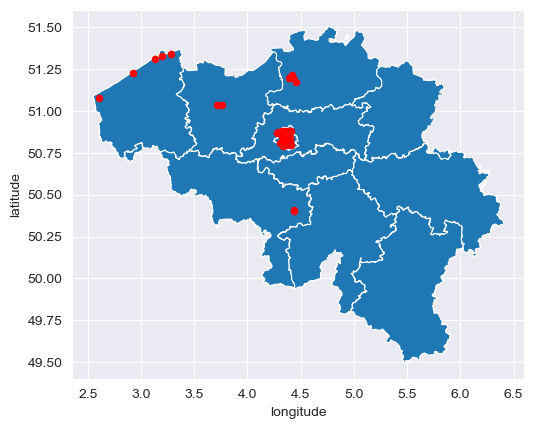

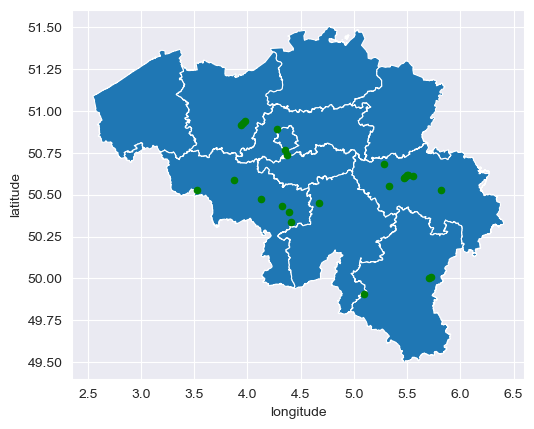

In [46]:
## plot it
ax = stations_metro_tram.plot('longitude', 'latitude', 'scatter',  color='red', zorder =10)
provinces.plot(linewidth = 0.8, ax = ax)
ax2 = stations_none.plot('longitude', 'latitude', 'scatter', color = 'green', zorder = 10)
provinces.plot(linewidth = 0.8, ax = ax2)
stations_metro_tram.sort_values(by = 'latitude')

We see that most of the stations with no facilities at all are situated in Wallonia, while only 'Charleroi Sud' and 'Charleroi Ouest' have tram or metro facilities in Wallonia.
Herefore, we can conclude that there are not many stations that could benefit from the tram and metro facilities as these are not close to stations with no facilities.